### Import Libraries

In [72]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
print(os.listdir("./input"))

['sampleSubmission.csv', 'test1', 'train']


### Preparing Training Data
Apply one-hot encoding to cat, dog labeled images

In [9]:
filenames = os.listdir("./input/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

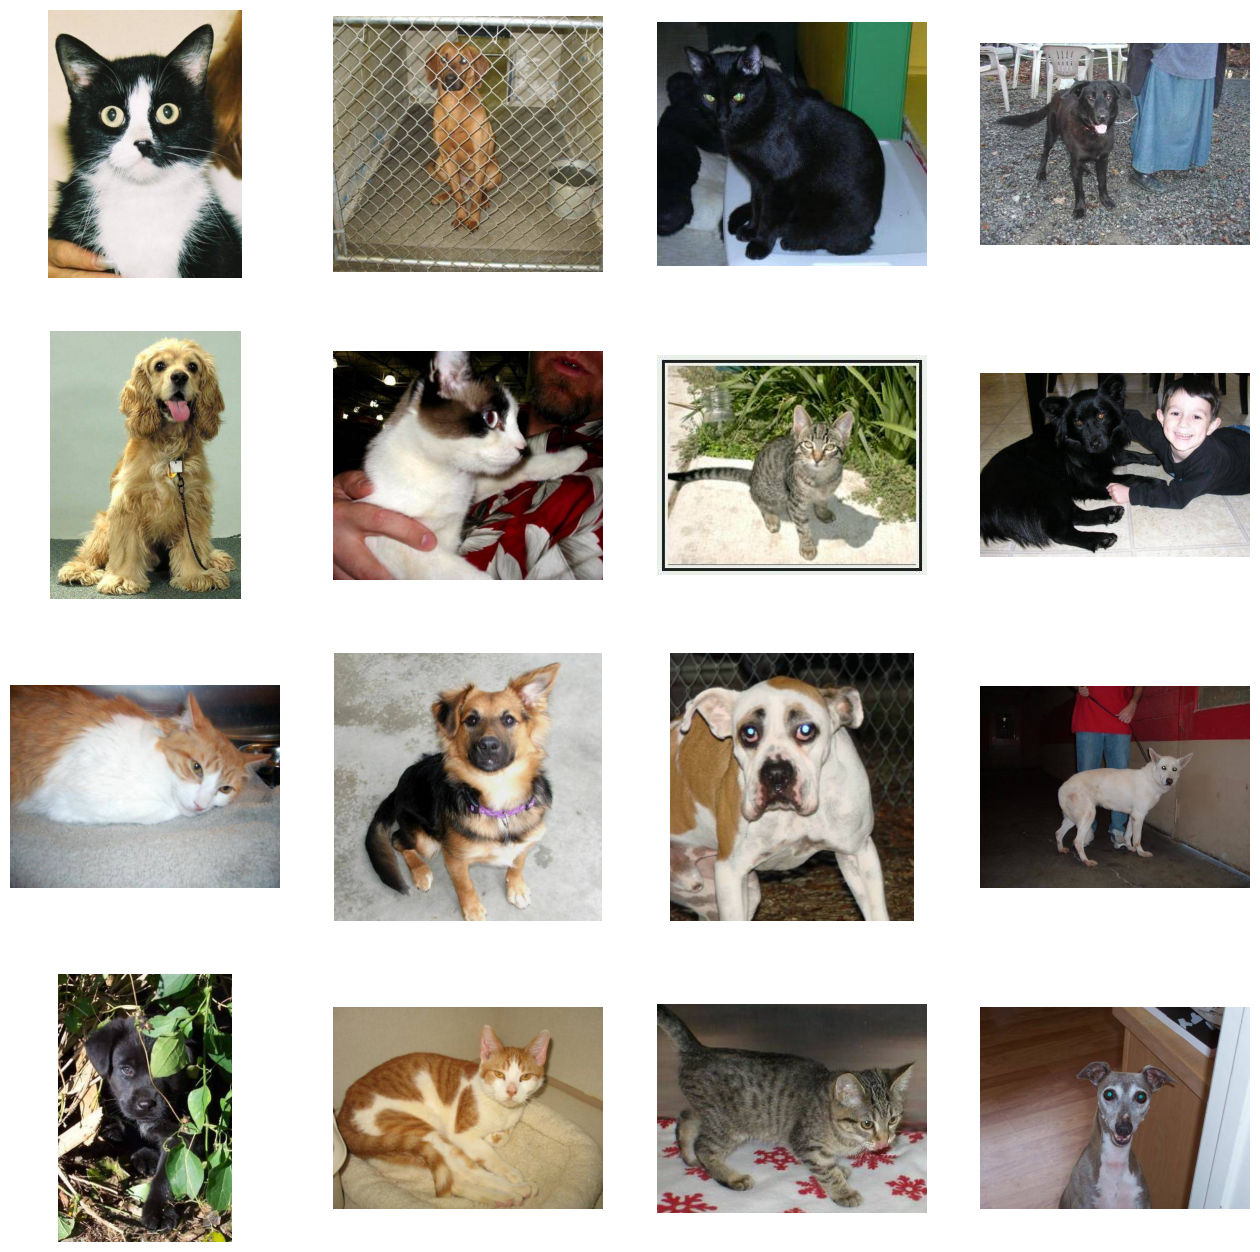

In [10]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

train_dir = os.path.join('./input/train')
train_names = os.listdir(train_dir)

train_images = [os.path.join(train_dir, fname) for fname in random.sample(train_names, 16)
]

for i, img_path in enumerate(train_images):
    sp = plt.subplot(4,4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

### Build Model
Four sets of convolution layers + max pooling layers followed by fully connected neural network. Batch normalization and dropout used to stabilize model. Cross entropy loss used for model with two possible classes.

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(2, activation='sigmoid') # 2 classes: cat & dog
])

model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
model.summary()

C:\Users\dingj\ml_projects\ml_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,903,042 (14.89 MB)

 Trainable params: 3,899,970 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

#### Callbacks
Reduce learning rate near plateau of parameter space and stop early if error doesn't improve after 10 learning iterations.

In [29]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

#### Prepare Data
Separate training data into training set (80%) and validation set (20%)

In [28]:
df['category'] = df['category'].replace({0:'cat', 1:'dog'})

train_df, validate_df = train_test_split(df, test_size=0.10, random_state=50)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)


In [14]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

#### Training Set Generator
Augment given images to make model more robust against slight variations such as zooming in, stretching, flipping, etc.

In [30]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "./input/train/",
    x_col='filename',
    y_col='category',
    target_size=(200,200),
    class_mode='categorical',
    batch_size=batch_size
)

Found 22500 validated image filenames belonging to 2 classes.


C:\Users\dingj\ml_projects\ml_venv\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


#### Validation Set Generator
Only want to normalize image values for robustness (no transformations).

In [18]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "./input/train/",
    x_col="filename",
    y_col='category',
    target_size=(200,200),
    class_mode='categorical',
    batch_size=batch_size
)

Found 2500 validated image filenames belonging to 2 classes.


C:\Users\dingj\ml_projects\ml_venv\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


To demonstrate what the generator does, here is an example:

Found 1 validated image filenames belonging to 1 classes.


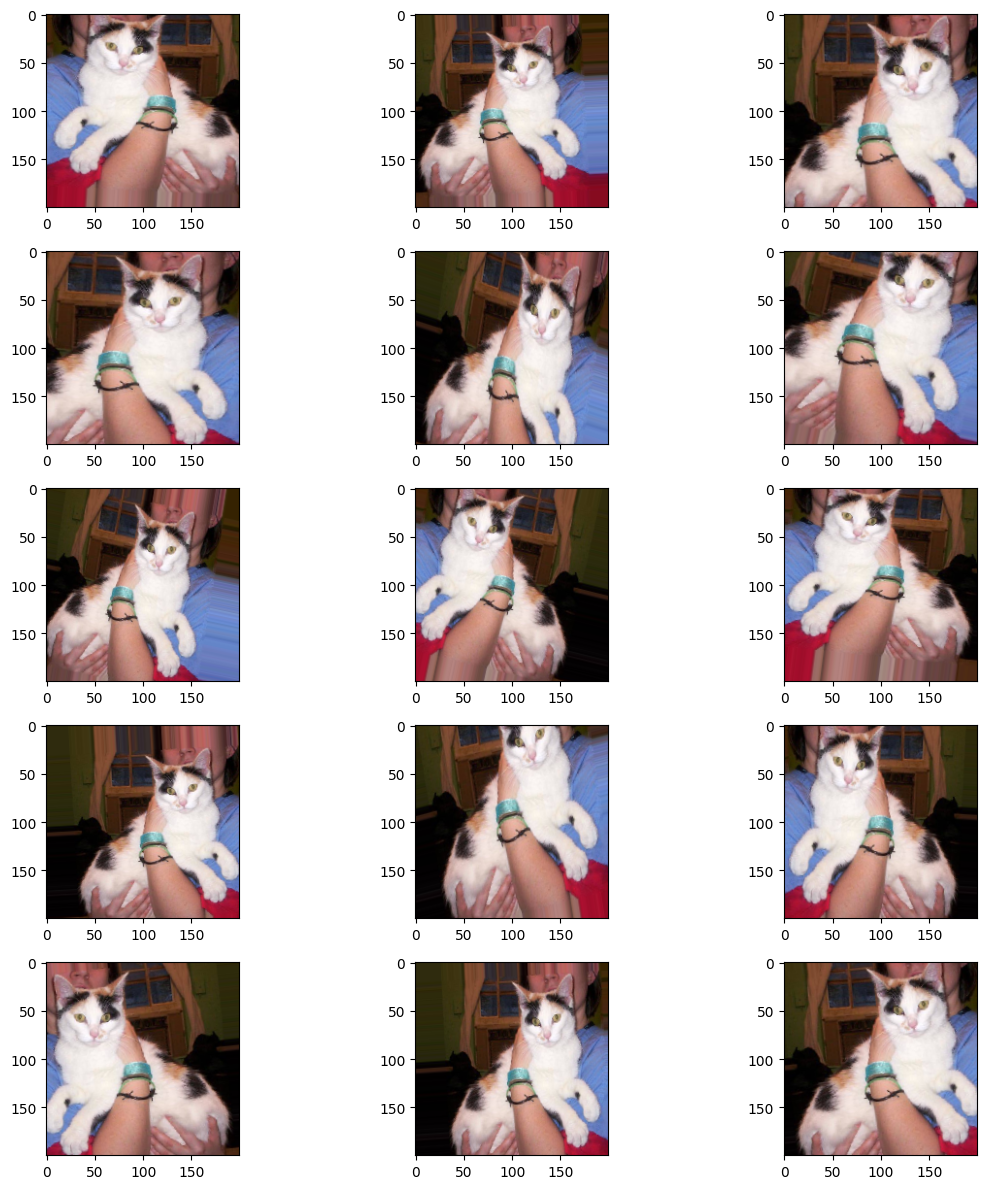

In [20]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "./input/train/",
    x_col='filename',
    y_col='category',
    target_size=(200,200),
    class_node='categorical',
    batch_size=batch_size
)

plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#### Fit Model
Only want to normalize image values for robustness (no transformations).

In [58]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1003s 657ms/step - accuracy: 0.5449 - loss: 0.7710 - val_accuracy: 0.5392 - val_loss: 0.6996 - learning_rate: 0.0010
Epoch 2/10


C:\Users\dingj\ml_projects\ml_venv\Lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1186s 791ms/step - accuracy: 0.6032 - loss: 0.6677 - val_accuracy: 0.6600 - val_loss: 0.6101 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 913s 608ms/step - accuracy: 0.6857 - loss: 0.5934 - val_accuracy: 0.6936 - val_loss: 0.6976 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3926s 3s/step - accuracy: 0.7390 - loss: 0.5365 - val_accuracy: 0.6960 - val_loss: 0.5800 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 875s 583ms/step - accuracy: 0.7610 - loss: 0.4948 - val_accuracy: 0.8132 - val_loss: 0.4245 - learning_rate: 0.0010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2293s 2s/step - accuracy: 0.7829 - loss: 0.4611 - val_accuracy: 0.8112 - val_loss: 0.4719 - learning_rate: 0.0010
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1044s 696ms/step - accuracy: 0.7971 - loss: 0.4408 - val_accuracy: 0.8324 - val_loss: 0.3883 - learning_rate: 0.0010
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 971s 648ms/step - accur

#### Visualize Training

<function matplotlib.pyplot.show(close=None, block=None)>

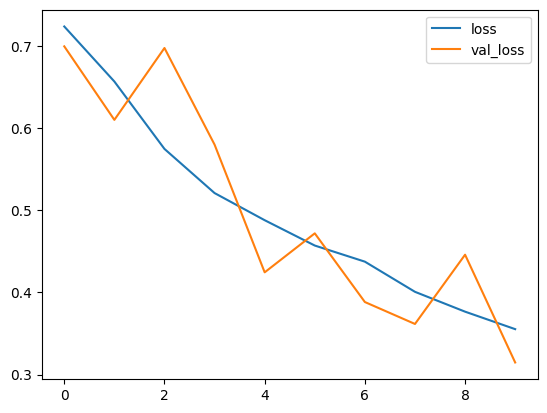

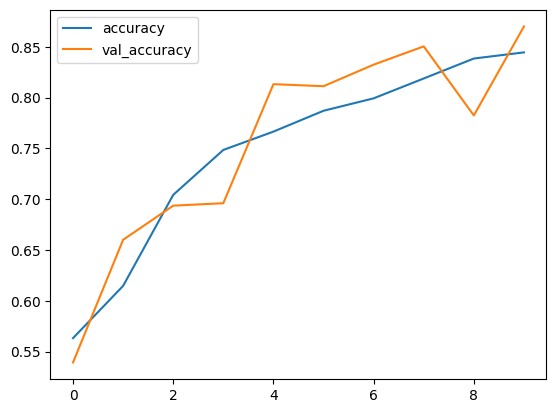

In [59]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show

#### Save Model

In [60]:
model.save("model.keras")

#### Testing Set Generator
Only want to normalize image values for robustness (no transformations).

In [77]:
test_filenames = os.listdir("./input/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [78]:
test_gen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "./input/test1/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(200,200),
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


#### Predict

In [79]:
# convert generator to tf.float32
def tf_generator(generator):
    for batch in generator:
        yield (tf.convert_to_tensor(batch, dtype=tf.float32),)

test_generator = tf_generator(test_generator)

predict = model.predict(test_generator, steps=int(np.ceil(nb_samples/batch_size)))

834/834 ━━━━━━━━━━━━━━━━━━━━ 224s 269ms/step


Model returns the probability of being dog and probability of being cat. Our prediction is the class with the higheset probability.

In [80]:
test_df['category'] = np.argmax(predict, axis=-1)

Relabel by mapping 1 to dog and 0 to cat.

In [81]:
label_map = dict((v, k) for k, v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

Examples of labelled test data

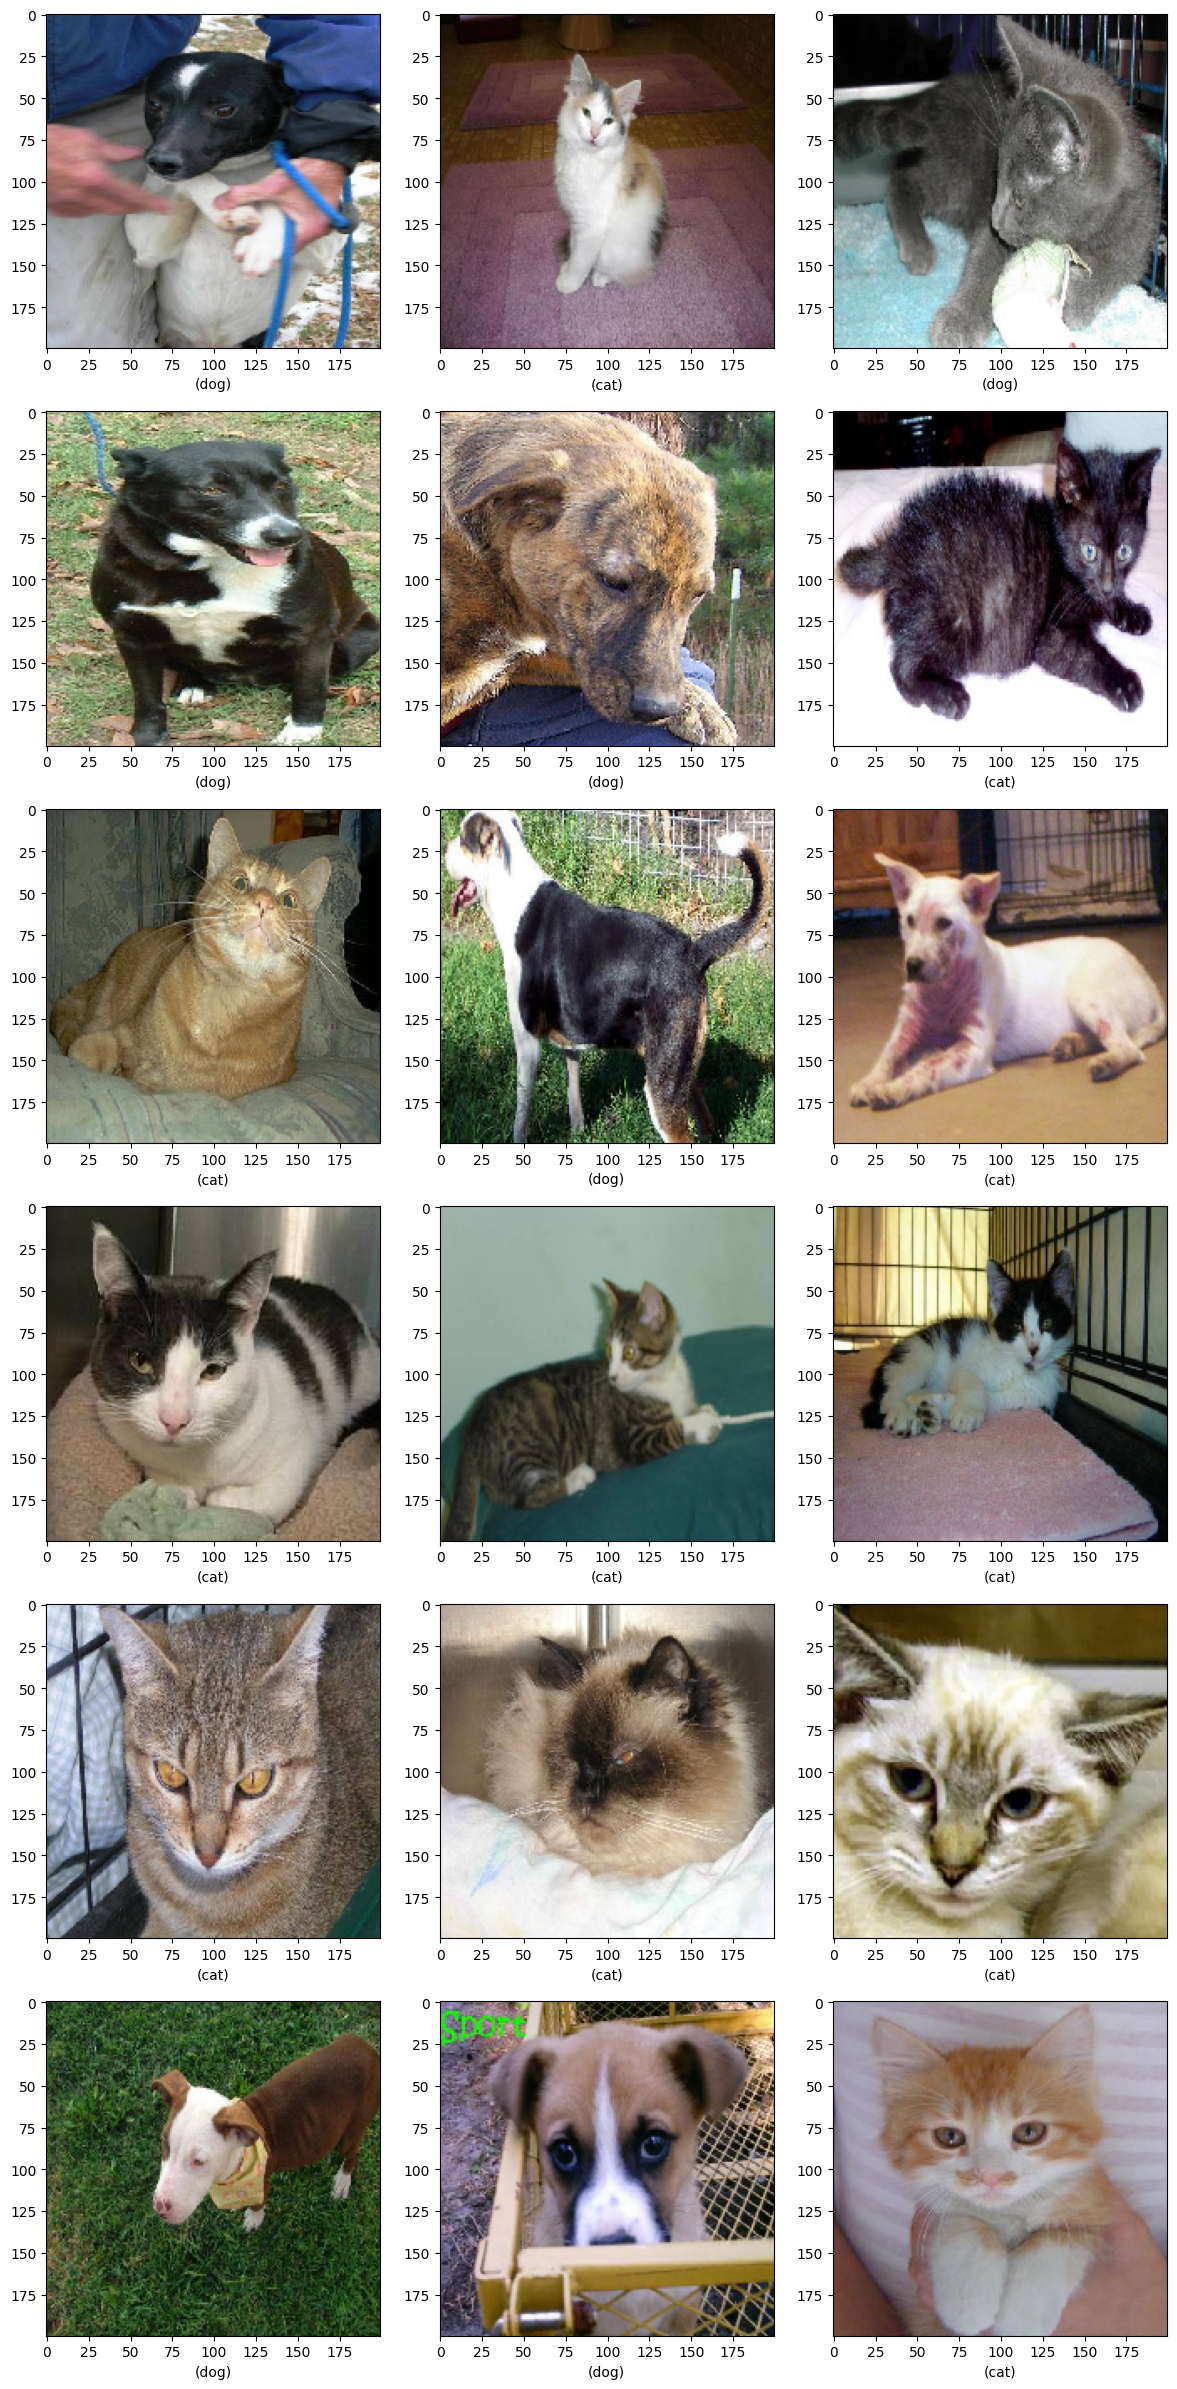

In [82]:
sample_test = test_df.head(18)
plt.figure(figsize=(12,24))
for i, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']

    img = load_img("./input/test1/"+filename, target_size=(200,200))
    plt.subplot(6,3, i+1)
    plt.imshow(img)
    plt.xlabel('(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()
    